<a href="https://colab.research.google.com/github/subi-147/TimeSeries_lab/blob/main/TSA_EXP_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [2]:
df = "GOOGL"
stock_data = yf.download(df, start="2015-01-01", end="2025-01-01")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
# Resampling to monthly data
monthly_data = stock_data['Close'].resample('M').mean()

<ipython-input-3-04cd8abbac1c>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = stock_data['Close'].resample('M').mean()


In [4]:
#train test split
train_data = monthly_data[:int(0.8*len(monthly_data))]
test_data = monthly_data[int(0.8*len(monthly_data)):]

In [5]:
# ARIMA Model
arima_model = ARIMA(train_data, order=(1, 1, 1))  # p=1, d=1, q=1 as an example
fit_arima = arima_model.fit()
forecast_arima = fit_arima.forecast(steps=len(test_data))

In [6]:
# (Seasonal) SARIMA Model
sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
fit_sarima = sarima_model.fit(disp=False)
forecast_sarima = fit_sarima.forecast(steps=len(test_data))

In [7]:
# Calculate MSE for comparison
mse_arima = mean_squared_error(test_data, forecast_arima)
mse_sarima = mean_squared_error(test_data, forecast_sarima)

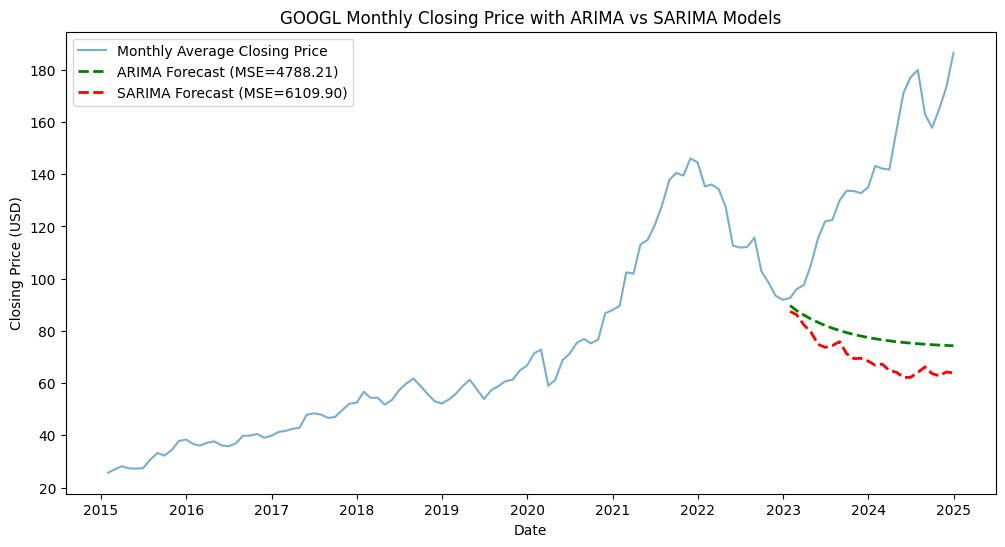

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Monthly Average Closing Price', alpha=0.6)
plt.plot(test_data.index, forecast_arima, label=f'ARIMA Forecast (MSE={mse_arima:.2f})', color='green', linestyle='--', linewidth=2)#(ARIMA Forecast)
plt.plot(test_data.index, forecast_sarima, label=f'SARIMA Forecast (MSE={mse_sarima:.2f})', color='red', linestyle='--', linewidth=2)#(SARIMA Forecast)
plt.title('GOOGL Monthly Closing Price with ARIMA vs SARIMA Models')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()


In [9]:
print(f"Mean Squared Error (ARIMA): {mse_arima:.2f}")
print(f"Mean Squared Error (SARIMA): {mse_sarima:.2f}")

Mean Squared Error (ARIMA): 4788.21
Mean Squared Error (SARIMA): 6109.90


In [10]:
future_steps = 24# Forecast for the next 12 months
future_forecast = fit_arima.forecast(steps=future_steps)


In [11]:
# Display future predictions
future_dates = pd.date_range(start=test_data.index[-1], periods=future_steps+1, freq='ME')[1:]
future_df = pd.DataFrame({'Date': future_dates, 'Forecasted Price': future_forecast})
print(future_df)

                 Date  Forecasted Price
2023-01-31 2025-01-31         89.684404
2023-02-28 2025-02-28         87.752747
2023-03-31 2025-03-31         86.050187
2023-04-30 2025-04-30         84.549553
2023-05-31 2025-05-31         83.226895
2023-06-30 2025-06-30         82.061107
2023-07-31 2025-07-31         81.033582
2023-08-31 2025-08-31         80.127923
2023-09-30 2025-09-30         79.329676
2023-10-31 2025-10-31         78.626102
2023-11-30 2025-11-30         78.005973
2023-12-31 2025-12-31         77.459391
2024-01-31 2026-01-31         76.977635
2024-02-29 2026-02-28         76.553016
2024-03-31 2026-03-31         76.178757
2024-04-30 2026-04-30         75.848886
2024-05-31 2026-05-31         75.558138
2024-06-30 2026-06-30         75.301873
2024-07-31 2026-07-31         75.076001
2024-08-31 2026-08-31         74.876918
2024-09-30 2026-09-30         74.701446
2024-10-31 2026-10-31         74.546785
2024-11-30 2026-11-30         74.410468
2024-12-31 2026-12-31         74.290318
